**ANN and CNN for recognition of random images**

**Author: Rameshwar L Kumawawt, Georgia Tech**

**The CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

In this dataset, there are 10000 test images and 50000 training images.

**1. Load All the Essential Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "brid", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

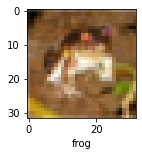

In [ ]:
plot_sample(X_train, y_train, 0)

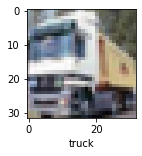

In [ ]:
plot_sample(X_train, y_train, 1)

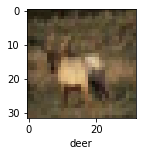

In [ ]:
plot_sample(X_train, y_train, 3)

Now we want to normalize our data. To do that we need to divide our data by 255.0

In [ ]:
X_train = X_train /255.0
X_test = X_test /255.0

**Model Building and Training**

Now we will build a Aritificial Neural Network * Convolutional Neural Network

In [ ]:
ann = models.Sequential([
                        layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8144 - accuracy: 0.3561
Epoch 2/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.6228 - accuracy: 0.4272
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5419 - accuracy: 0.4577
Epoch 4/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4822 - accuracy: 0.4771
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4315 - accuracy: 0.4944
Epoch 6/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3905 - accuracy: 0.5119
Epoch 7/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3518 - accuracy: 0.5245
Epoch 8/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3157 - accuracy: 0.5354
Epoch 9/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.2844 - accuracy: 0.5477
Epoch 10/10
1563/1563 [==============================] -

In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4421 - accuracy: 0.4787


[1.4421300888061523, 0.47870001196861267]

**ANN Classification Report**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes  =[np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.64      0.56      1000
           1       0.42      0.82      0.56      1000
           2       0.43      0.30      0.35      1000
           3       0.43      0.22      0.29      1000
           4       0.34      0.61      0.43      1000
           5       0.61      0.17      0.26      1000
           6       0.53      0.57      0.55      1000
           7       0.65      0.50      0.56      1000
           8       0.57      0.67      0.61      1000
           9       0.64      0.30      0.41      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.46     10000
weighted avg       0.51      0.48      0.46     10000



In [ ]:
cnn = models.Sequential([
                         
                         # cnn layers
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         # dense layers
                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.5353 - accuracy: 0.4469
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2034 - accuracy: 0.5769
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0831 - accuracy: 0.6204
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0044 - accuracy: 0.6498
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9485 - accuracy: 0.6684
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9023 - accuracy: 0.6861
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8605 - accuracy: 0.6995
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8246 - accuracy: 0.7130
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7933 - accuracy: 0.7212
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9438 - accuracy: 0.6814


[0.9438046813011169, 0.6814000010490417]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

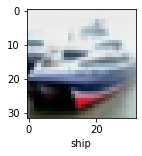

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.7404502e-03, 1.7713252e-05, 2.0712815e-02, 7.1616936e-01,
        5.0377130e-04, 2.4578296e-01, 8.6877020e-03, 1.2146910e-03,
        3.7657393e-03, 4.0477750e-04],
       [2.9884232e-02, 3.0107893e-02, 1.0169683e-05, 1.0889800e-07,
        1.2318444e-07, 6.4594052e-10, 6.5958607e-09, 1.0717555e-09,
        9.3979919e-01, 1.9830554e-04],
       [8.3310254e-02, 4.4887807e-02, 7.5435652e-03, 2.0834727e-03,
        9.3676645e-05, 1.7102457e-04, 3.8962742e-05, 7.8380958e-04,
        8.5262334e-01, 8.4640859e-03],
       [4.7332695e-01, 1.7751530e-02, 7.7790059e-03, 1.2326844e-04,
        4.0246504e-03, 1.4488763e-05, 2.1899359e-04, 3.1473887e-06,
        4.9649319e-01, 2.6470306e-04],
       [2.5244981e-06, 1.1138608e-05, 3.9287917e-02, 1.0749704e-02,
        4.8821744e-01, 9.7777473e-04, 4.6070677e-01, 1.3986903e-05,
        2.8878432e-05, 3.9238480e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.82      0.71      1000
           1       0.82      0.76      0.79      1000
           2       0.54      0.61      0.57      1000
           3       0.50      0.53      0.51      1000
           4       0.70      0.54      0.61      1000
           5       0.62      0.54      0.58      1000
           6       0.81      0.70      0.75      1000
           7       0.75      0.75      0.75      1000
           8       0.77      0.78      0.78      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

